<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Membuat data acak yang terlihat linear
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Menambahkan x0 = 1 ke setiap instance (untuk bias term)
X_b = np.c_[np.ones((100, 1)), X]

# Menghitung theta menggunakan Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# theta_best akan berisi nilai parameter yang optimal
print(theta_best)

[[4.18835878]
 [2.90698184]]


In [2]:
from sklearn.linear_model import SGDRegressor

# SGDRegressor secara default melakukan optimisasi dengan Stochastic Gradient Descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel() mengubah y menjadi array 1D

# Melihat parameter yang ditemukan
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.1946565] [2.91405813]


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Membuat data non-linear (kuadratik)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Menambahkan fitur polinomial (pangkat 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Melatih model Linear Regression pada data polinomial
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [4]:
from sklearn.linear_model import Ridge

# Melatih model Ridge Regression
# alpha mengontrol seberapa besar regularisasi yang diberikan
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [5]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Menggunakan dataset Iris
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 jika Iris-Virginica, else 0

# Melatih model Regresi Logistik
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

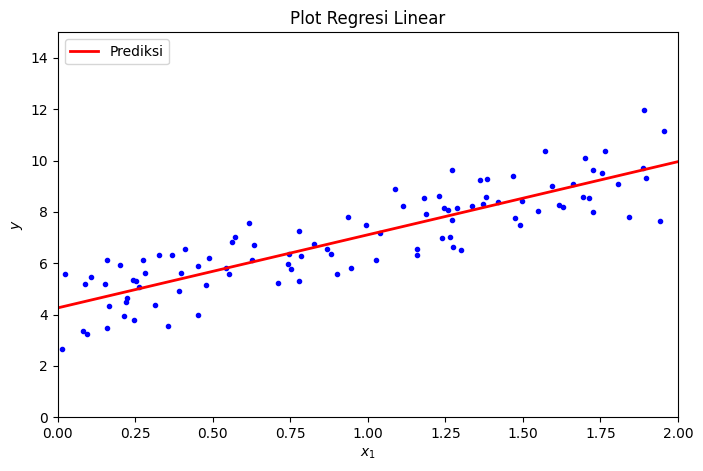

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Membuat data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Melatih model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Membuat data baru untuk plotting garis prediksi
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediksi")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.title("Plot Regresi Linear")
plt.show()

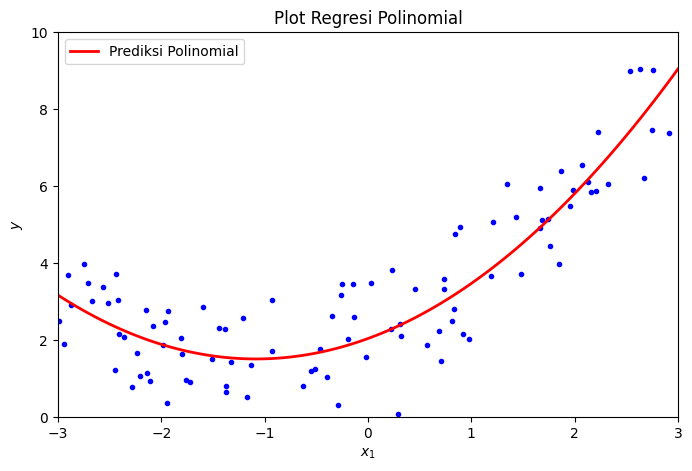

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Membuat data non-linear
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Menambahkan fitur polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Melatih model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Membuat data untuk plotting garis kurva
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediksi Polinomial")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.title("Plot Regresi Polinomial")
plt.show()

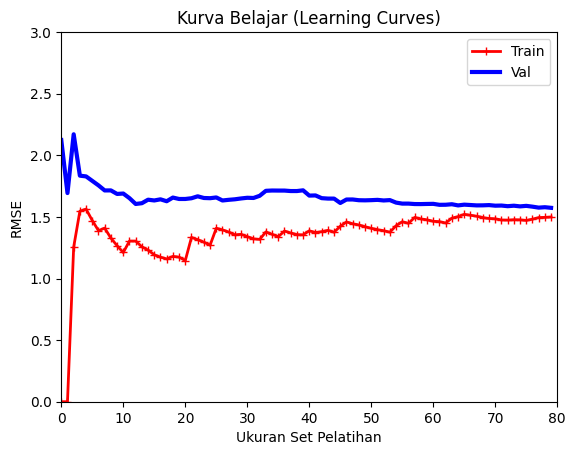

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.legend(loc="upper right")
    plt.xlabel("Ukuran Set Pelatihan")
    plt.ylabel("RMSE")
    plt.title("Kurva Belajar (Learning Curves)")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

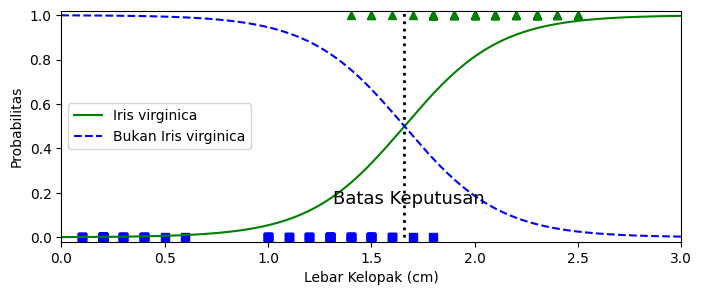

In [11]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 jika Iris-Virginica, else 0

log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Bukan Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Batas Keputusan", fontsize=13, color="k", ha="center")
plt.xlabel("Lebar Kelopak (cm)")
plt.ylabel("Probabilitas")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


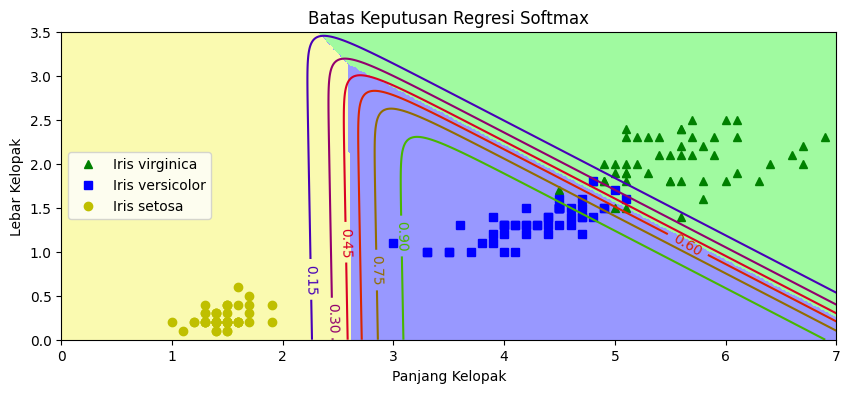

In [12]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.xlabel("Panjang Kelopak")
plt.ylabel("Lebar Kelopak")
plt.legend(loc="center left")
plt.axis([0, 7, 0, 3.5])
plt.title("Batas Keputusan Regresi Softmax")
plt.show()